In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd

# Correction : Utilisation de r'' pour les chemins Windows
# Correction : Ajout de la barre oblique manquante (\) entre Data et Camp_Market
file_path = r'C:\Users\nseke\Documents\GitHub\RUSH-4---Camp-market\Data\Camp_Market_Cleaned_Grade.csv'

try:
    df = pd.read_csv(file_path)

    print(" Fichier chargé avec succès !")
    print("\n--- Tête du DataFrame ---")
    print(df.head())

except FileNotFoundError:
    print(" ERREUR: Fichier non trouvé.")
    print(f"Vérifiez que ce chemin est correct : {file_path}")

 Fichier chargé avec succès !

--- Tête du DataFrame ---
     ID  Year_Birth   Education Marital_Status  Income Dt_Customer  \
0  5524        1957  Graduation         Single   58138  04/09/2012   
1  2174        1954  Graduation         Single   46344  08/03/2014   
2  4141        1965  Graduation         Couple   71613  21/08/2013   
3  6182        1984  Graduation         Couple   26646  10/02/2014   
4  5324        1981         PhD         Couple   58293  19/01/2014   

   Last_Purchase  MntWines  MntFruits  MntMeatProducts  ...  Z_CostContact  \
0             58       635         88              546  ...              3   
1             38        11          1                6  ...              3   
2             26       426         49              127  ...              3   
3             26        11          4               20  ...              3   
4             94       173         43              118  ...              3   

   Z_Revenue  Response  Customer_For_Months  Children

In [12]:
# Afficher des informations sur le DataFrame (types de données, valeurs manquantes)
print("\n--- Informations sur le DataFrame ---")
print(df.info())

# Afficher un résumé statistique des colonnes numériques
print("\n--- Résumé Statistique ---")
print(df.describe())

# Vérifier le nombre de lignes et de colonnes
print(f"\n--- Dimensions du DataFrame : {df.shape}")


--- Informations sur le DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2039 non-null   int64 
 1   Year_Birth           2039 non-null   int64 
 2   Education            2039 non-null   object
 3   Marital_Status       2039 non-null   object
 4   Income               2039 non-null   int64 
 5   Dt_Customer          2039 non-null   object
 6   Last_Purchase        2039 non-null   int64 
 7   MntWines             2039 non-null   int64 
 8   MntFruits            2039 non-null   int64 
 9   MntMeatProducts      2039 non-null   int64 
 10  MntFishProducts      2039 non-null   int64 
 11  MntSweetProducts     2039 non-null   int64 
 12  MntGoldProds         2039 non-null   int64 
 13  NumDealsPurchases    2039 non-null   int64 
 14  NumWebPurchases      2039 non-null   int64 
 15  NumCatalogPurcha

In [13]:
# Sélectionner les colonnes de type 'object' (généralement catégorielles)
categorical_cols = df.select_dtypes(include=['object']).columns

print("--- Analyse des Variables Catégorielles ---")

# Afficher le nombre de valeurs uniques et la distribution des fréquences
for col in categorical_cols:
    print(f"\nColonne : {col}")
    print(f"Nombre de valeurs uniques : {df[col].nunique()}")
    
    # Afficher les 10 valeurs les plus fréquentes
    print("Distribution des fréquences (Top 10) :")
    print(df[col].value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + '%')

--- Analyse des Variables Catégorielles ---

Colonne : Education
Nombre de valeurs uniques : 5
Distribution des fréquences (Top 10) :
Education
Graduation    50.27%
PhD           21.68%
Master        16.53%
2n Cycle       9.12%
Highschool      2.4%
Name: proportion, dtype: object

Colonne : Marital_Status
Nombre de valeurs uniques : 2
Distribution des fréquences (Top 10) :
Marital_Status
Couple    64.0%
Single    36.0%
Name: proportion, dtype: object

Colonne : Dt_Customer
Nombre de valeurs uniques : 663
Distribution des fréquences (Top 10) :
Dt_Customer
12/05/2014    0.49%
02/01/2013    0.44%
23/03/2014    0.44%
01/03/2014    0.44%
20/08/2013    0.44%
31/08/2012    0.44%
12/09/2012    0.44%
14/02/2013    0.39%
12/01/2013    0.39%
05/04/2014    0.39%
Name: proportion, dtype: object

Colonne : Age_group
Nombre de valeurs uniques : 7
Distribution des fréquences (Top 10) :
Age_group
40-49    32.32%
50-59    21.63%
30-39    20.79%
60-69    17.12%
20-29     6.33%
70-79     1.67%
100+      0

--- Visualisation des Distributions Numériques ---


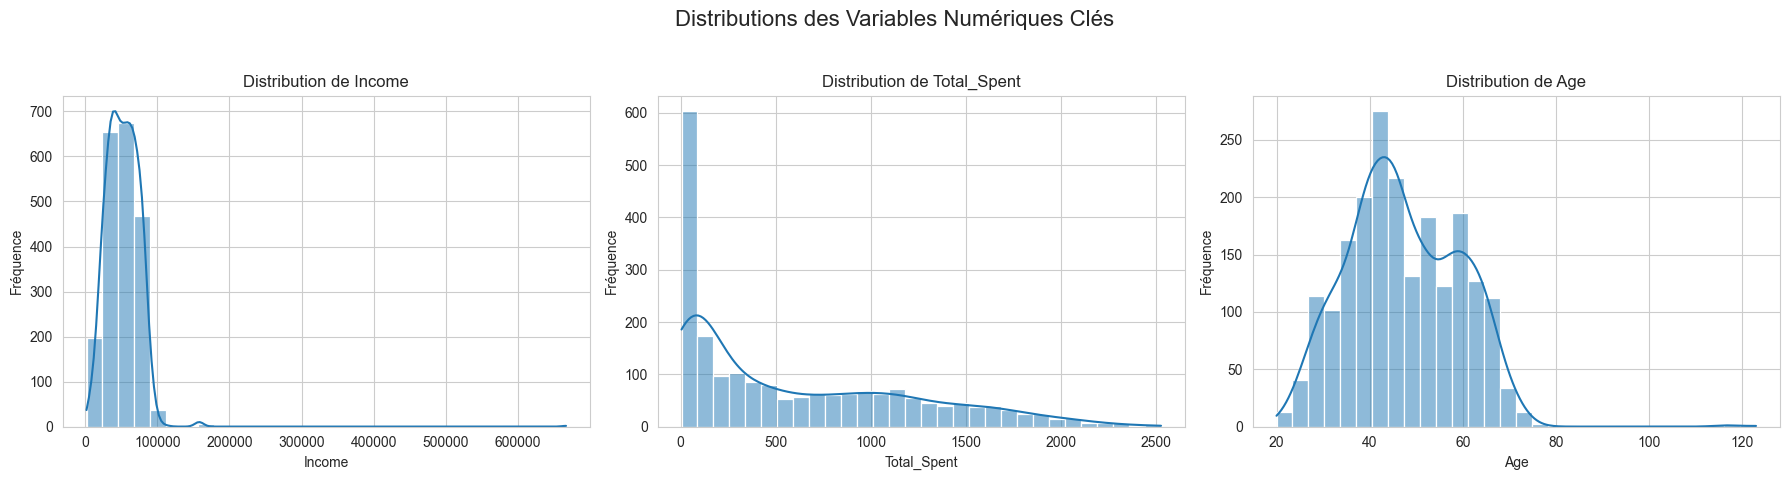

In [14]:

# Configurer le style des graphiques
sns.set_style("whitegrid")

numerical_cols_to_plot = ['Income', 'Total_Spent', 'Age']

print("--- Visualisation des Distributions Numériques ---")

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distributions des Variables Numériques Clés', fontsize=16)

for i, col in enumerate(numerical_cols_to_plot):
    # Histogramme pour la distribution
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuster pour le titre
plt.show()

--- Matrice de Corrélation entre Dépenses, Revenu et Âge ---
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines              1.00       0.39             0.56             0.40   
MntFruits             0.39       1.00             0.54             0.59   
MntMeatProducts       0.56       0.54             1.00             0.56   
MntFishProducts       0.40       0.59             0.56             1.00   
MntSweetProducts      0.38       0.55             0.51             0.58   
MntGoldProds          0.39       0.40             0.34             0.42   
Total_Spent           0.89       0.61             0.84             0.64   
Income                0.56       0.42             0.56             0.43   
Age                   0.16       0.03             0.04             0.04   

                  MntSweetProducts  MntGoldProds  Total_Spent  Income   Age  
MntWines                      0.38          0.39         0.89    0.56  0.16  
MntFruits                     0.

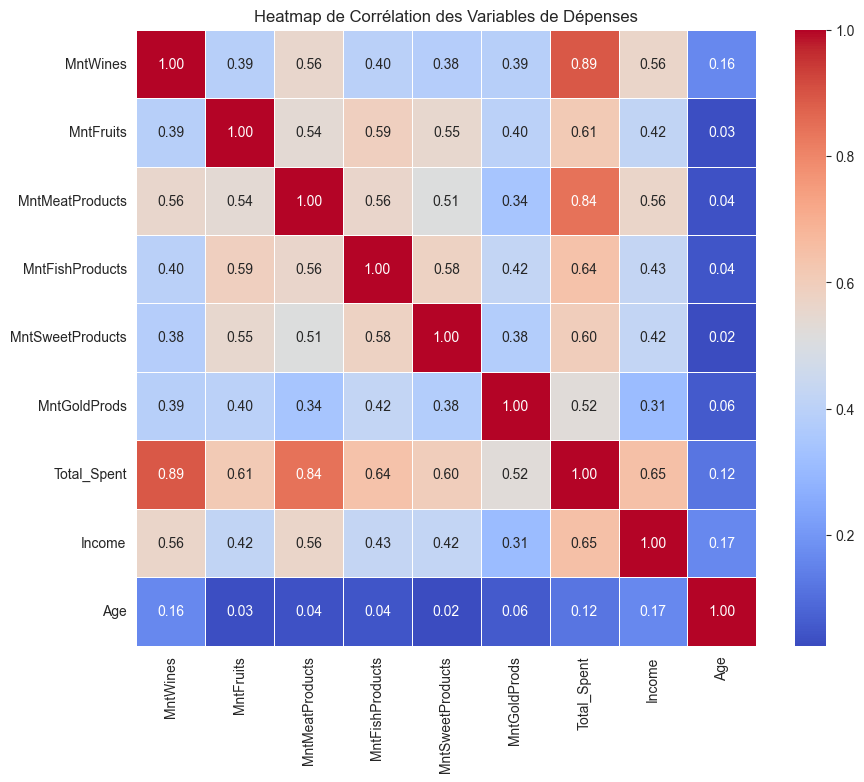

In [15]:
# Sélectionner les colonnes de dépenses et autres numériques pertinentes
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 'Total_Spent', 'Income', 'Age']

# Calculer la matrice de corrélation
correlation_matrix = df[spend_cols].corr()

print("--- Matrice de Corrélation entre Dépenses, Revenu et Âge ---")
print(correlation_matrix.round(2))

# Visualisation de la matrice de corrélation (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Corrélation des Variables de Dépenses')
plt.show()

--- Analyse des Produits Préférés (Dépenses) ---

--- Dépenses Totales par Produit (en ordre décroissant) ---
MntWines            618,494
MntMeatProducts     342,053
MntGoldProds         89,227
MntFishProducts      76,374
MntSweetProducts     55,493
MntFruits            53,730
dtype: object

--- Dépenses Moyennes par Client et par Produit ---
MntWines            303.33
MntMeatProducts     167.76
MntGoldProds         43.76
MntFishProducts      37.46
MntSweetProducts     27.22
MntFruits            26.35
dtype: object

Conclusion :
Le produit pour lequel le montant TOTAL le plus élevé a été dépensé est : MntWines
Le produit pour lequel le montant MOYEN par client est le plus élevé est : MntWines


C:\Users\nseke\AppData\Local\Temp\ipykernel_33196\893610201.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_spent_by_product.index, y=total_spent_by_product.values, palette="viridis")


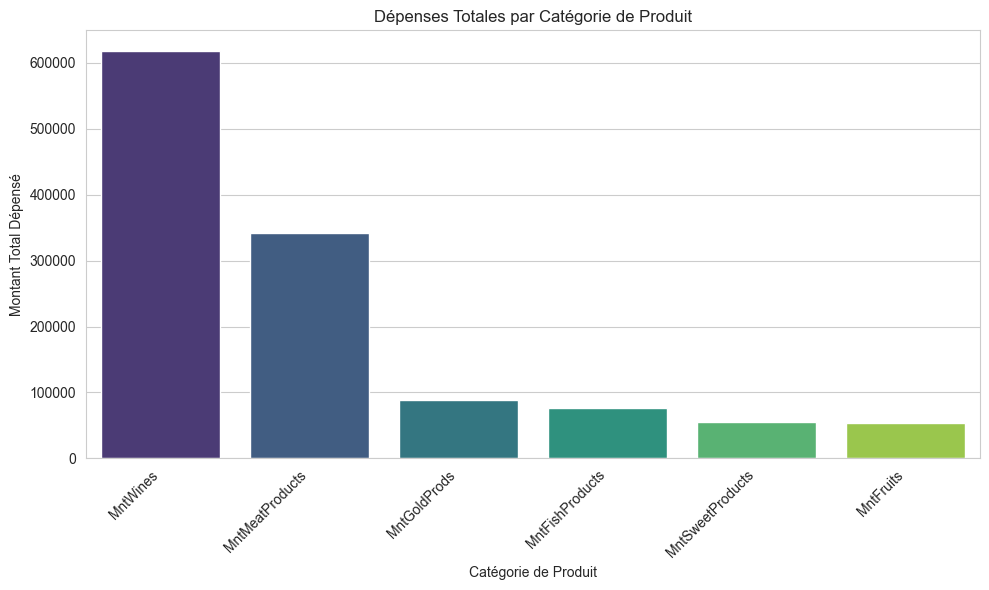

In [16]:
# Colonnes de dépenses de produits (Montant dépensé)
mnt_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds']

print("--- Analyse des Produits Préférés (Dépenses) ---")

# Calculer les dépenses totales pour chaque catégorie de produit
total_spent_by_product = df[mnt_cols].sum().sort_values(ascending=False)

print("\n--- Dépenses Totales par Produit (en ordre décroissant) ---")
print(total_spent_by_product.map('{:,.0f}'.format)) # Formatage pour une meilleure lisibilité

# Calculer les dépenses moyennes pour chaque catégorie de produit
average_spent_by_product = df[mnt_cols].mean().sort_values(ascending=False)

print("\n--- Dépenses Moyennes par Client et par Produit ---")
print(average_spent_by_product.map('{:,.2f}'.format))

# Déterminer la catégorie avec les dépenses totales les plus élevées
most_preferred_total = total_spent_by_product.index[0]
most_preferred_average = average_spent_by_product.index[0]

print(f"\nConclusion :")
print(f"Le produit pour lequel le montant TOTAL le plus élevé a été dépensé est : {most_preferred_total}")
print(f"Le produit pour lequel le montant MOYEN par client est le plus élevé est : {most_preferred_average}")

# Visualisation des dépenses totales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=total_spent_by_product.index, y=total_spent_by_product.values, palette="viridis")
plt.title('Dépenses Totales par Catégorie de Produit')
plt.ylabel('Montant Total Dépensé')
plt.xlabel('Catégorie de Produit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

--- Analyse de la Répartition par Statut Marital et Éducation ---

--- Tableau Croisé des Effectifs (Statut Marital vs Éducation) ---
Education       2n Cycle  Graduation  Highschool  Master  PhD
Marital_Status                                               
Couple               122         647          29     224  283
Single                64         378          20     113  159

--- Tableau Croisé des Proportions (Proportion de chaque LIGNE) ---
Education      2n Cycle Graduation Highschool  Master     PhD
Marital_Status                                               
Couple            9.35%     49.58%      2.22%  17.16%  21.69%
Single            8.72%      51.5%      2.72%   15.4%  21.66%


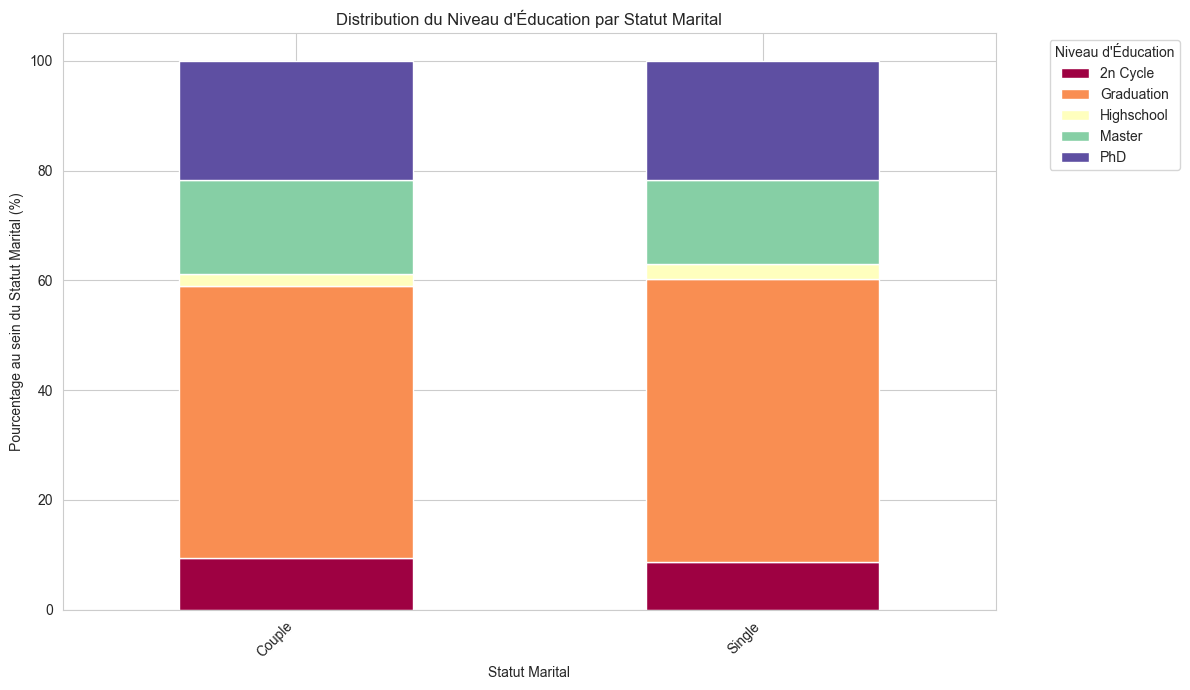


--- Dépenses Moyennes Totales par Statut Marital et Éducation ---
Education      2n Cycle Graduation Highschool Master  PhD
Marital_Status                                           
Couple              433        625        101    571  685
Single              598        620         58    696  636


In [17]:

print("--- Analyse de la Répartition par Statut Marital et Éducation ---")

# 1. Tableau Croisé des Effectifs (Counts)
# Compter le nombre de clients pour chaque combinaison Statut Marital / Éducation
cross_tab_counts = pd.crosstab(df['Marital_Status'], df['Education'], dropna=False)

print("\n--- Tableau Croisé des Effectifs (Statut Marital vs Éducation) ---")
print(cross_tab_counts)

# 2. Tableau Croisé des Proportions (pourcentage de la LIGNE)
# Montre la distribution de l'éducation À L'INTÉRIEUR de chaque statut marital
cross_tab_prop_row = pd.crosstab(df['Marital_Status'], df['Education'], normalize='index') * 100

print("\n--- Tableau Croisé des Proportions (Proportion de chaque LIGNE) ---")
print(cross_tab_prop_row.round(2).astype(str) + '%')

# 3. Visualisation de la Répartition (Graphique à barres empilées)
plt.figure(figsize=(12, 7))
# Utiliser le DataFrame de proportions par ligne pour une comparaison claire
cross_tab_prop_row.plot(kind='bar', stacked=True, colormap='Spectral', ax=plt.gca())

plt.title('Distribution du Niveau d\'Éducation par Statut Marital')
plt.xlabel('Statut Marital')
plt.ylabel('Pourcentage au sein du Statut Marital (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Niveau d\'Éducation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Analyse des Dépenses Moyennes par Catégorie Conjointe
# Examiner si le profil (Marital + Éducation) influence la dépense
avg_spent_crosstab = df.groupby(['Marital_Status', 'Education'])['Total_Spent'].mean().unstack()

print("\n--- Dépenses Moyennes Totales par Statut Marital et Éducation ---")
print(avg_spent_crosstab.map('{:,.0f}'.format))

--- Analyse des Visites Web et des Achats en Ligne ---

--- Résumé Statistique des Activités Web ---
       NumWebVisitsMonth  NumWebPurchases
count        2039.000000      2039.000000
mean            5.310446         4.098578
std             2.438496         2.799936
min             0.000000         0.000000
25%             3.000000         2.000000
50%             6.000000         4.000000
75%             7.000000         6.000000
max            20.000000        27.000000

--- Distribution des Visites Web par Mois ---
NumWebVisitsMonth
0      11
1     138
2     183
3     190
4     200
5     259
6     308
7     358
8     301
9      79
10      3
13      1
14      2
17      1
19      2
20      3
Name: count, dtype: int64


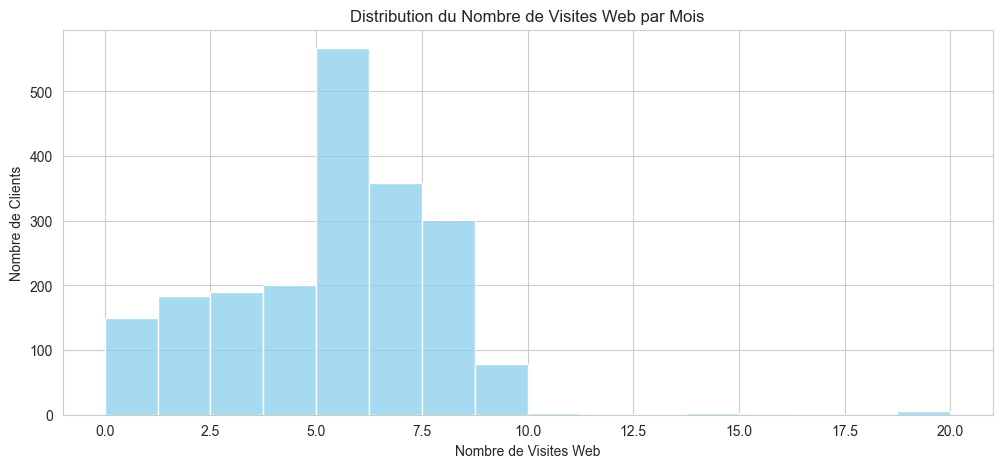


--- Corrélation entre Visites Web et Achats Web : -0.05


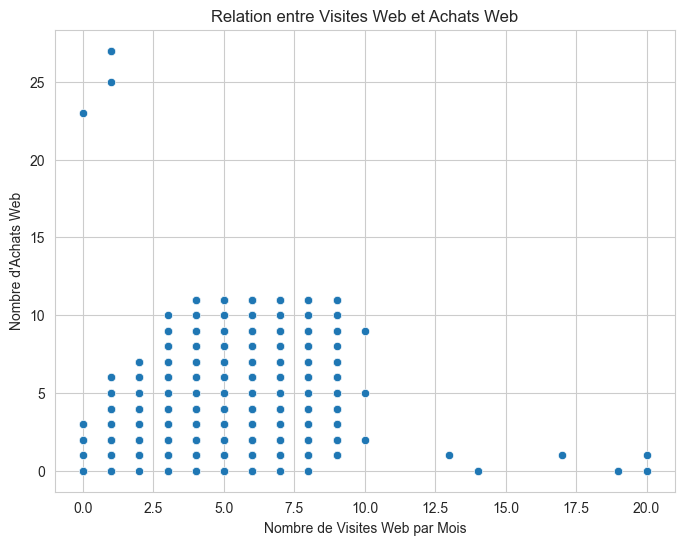

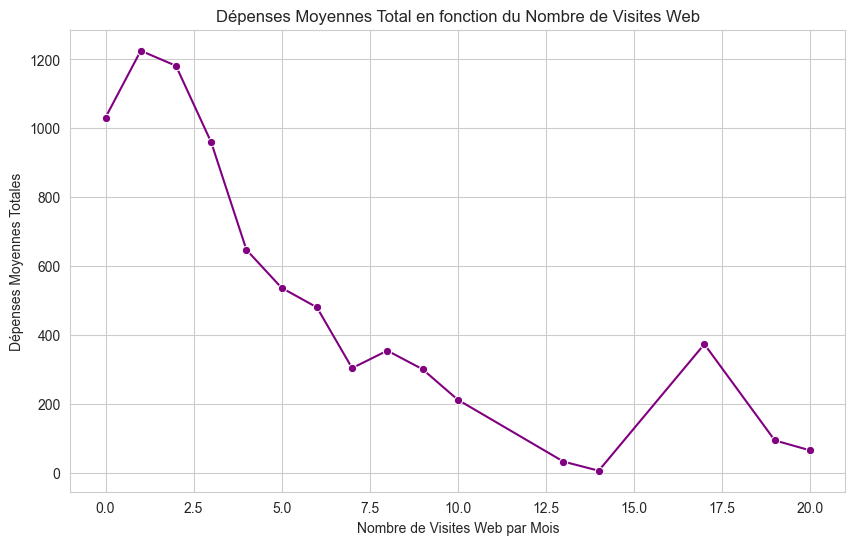

In [18]:


print("--- Analyse des Visites Web et des Achats en Ligne ---")

# 1. Résumé statistique des variables web
print("\n--- Résumé Statistique des Activités Web ---")
print(df[['NumWebVisitsMonth', 'NumWebPurchases']].describe())

# 2. Distribution des visites web
print("\n--- Distribution des Visites Web par Mois ---")
web_visits_counts = df['NumWebVisitsMonth'].value_counts().sort_index()
print(web_visits_counts)

# Visualisation des visites web
plt.figure(figsize=(12, 5))
sns.histplot(df['NumWebVisitsMonth'], bins=df['NumWebVisitsMonth'].nunique(), kde=False, color='skyblue')
plt.title('Distribution du Nombre de Visites Web par Mois')
plt.xlabel('Nombre de Visites Web')
plt.ylabel('Nombre de Clients')
plt.show()

# 3. Calculer le Taux de Conversion Web (Achat Web / Visite Web)
# Note : Pour éviter la division par zéro, on peut se concentrer uniquement sur les clients qui ont visité le site.
# Nous allons plutôt analyser la relation pour voir l'impact.

# Relation entre les visites web et les achats web (Corrélation)
correlation = df['NumWebVisitsMonth'].corr(df['NumWebPurchases'])
print(f"\n--- Corrélation entre Visites Web et Achats Web : {correlation:.2f}")

# Visualisation de la relation (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df)
plt.title('Relation entre Visites Web et Achats Web')
plt.xlabel('Nombre de Visites Web par Mois')
plt.ylabel('Nombre d\'Achats Web')
plt.show()

# 4. Analyse de l'impact des visites sur le total des dépenses
# Groupement par nombre de visites pour voir l'évolution des dépenses moyennes
web_impact = df.groupby('NumWebVisitsMonth')['Total_Spent'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='NumWebVisitsMonth', y='Total_Spent', data=web_impact, marker='o', color='purple')
plt.title('Dépenses Moyennes Total en fonction du Nombre de Visites Web')
plt.xlabel('Nombre de Visites Web par Mois')
plt.ylabel('Dépenses Moyennes Totales')
plt.show()